In [1]:
import sys
sys.path.insert(0,"..")

from src import dataset as db
from src import util as iu
from src.pixelate import Pixelate
from src.resize import Resize
from src.dp_pixel import dp_pixelate

In [2]:
miniImageNet = db.MiniImageNetDataset()
test_image = miniImageNet.load_images(n=1)[0]
target_h, target_w = miniImageNet.scale

In [3]:
print("Input Dim: ", (test_image.shape[0], test_image.shape[1]))
print("Target Dim: ", (target_h, target_w))

Input Dim:  (640, 457)
Target Dim:  (84, 84)


In [4]:
results = []
labels = []

In [5]:
for resize_f in [Resize.pad_image, Resize.crop_image]:
    labels.append("Original")
    results.append(test_image)
    
    resized_img, f_h, f_w = resize_f(test_image, target_h, target_w)
    labels.append('Resize.' + resize_f.__name__)
    results.append(resized_img)
        
    for pixelate_f in [Pixelate.sequential, Pixelate.skimage, Pixelate.pytorch]:
        
        px_img = pixelate_f(resized_img, f_h, f_w)
        labels.append('Pixelate.' + pixelate_f.__name__)
        results.append(px_img)
    
    dp_px = dp_pixelate(test_image, target_h, target_w, 10, 5, resize_f=resize_f)
    labels.append("dp pixelated")
    results.append(dp_px)
    

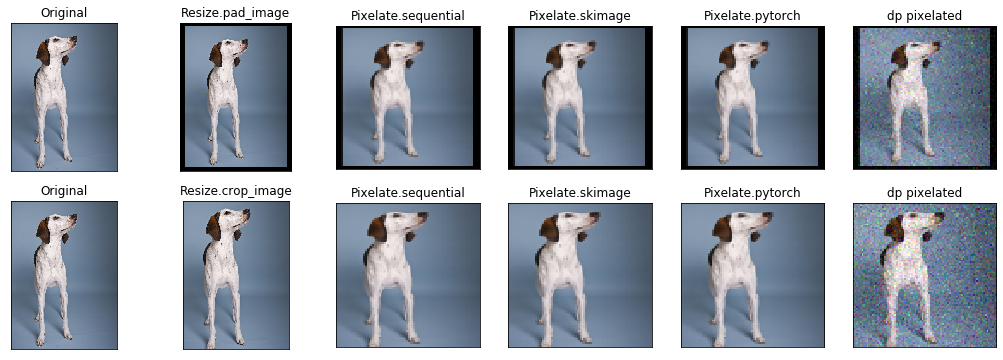

In [6]:
iu.display_image_grid(results, titles=labels, num_cols=6, size=(18,6))